In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<Axes: >

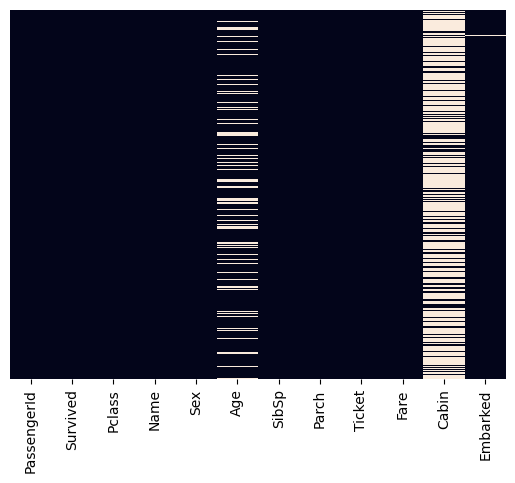

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Making Sex dummy variable

In [5]:
def process_sex():
    global df
    
    sex = pd.get_dummies(df['Sex'],drop_first=True,dtype=int)
    df.drop('Sex',axis=1,inplace=True)
    df = pd.concat([df,sex],axis=1)
process_sex()

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


# Getting titles from names and further grouping them

In [7]:
titles = set()
for name in df['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print(titles)

{'Col', 'Mlle', 'Capt', 'Master', 'Ms', 'Don', 'the Countess', 'Mme', 'Sir', 'Rev', 'Mr', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Miss', 'Mrs'}


In [8]:
title_group = {
    'Lady' : 'Royal',
    'Jonkheer': 'Royal',
    'Rev': 'Officer',
    'Mrs': 'Mrs',
    'Mme': 'Mrs',
    'Capt': 'Officer',
    'Ms': 'Mrs',
    'Col': 'Officer',
    'Mr': 'Mr', 
    'Sir': 'Royal', 
    'Mlle': 'Miss', 
    'Miss': 'Miss', 
    'Master': 'Master', 
    'the Countess' : 'Royal', 
    'Don': 'Royal', 
    'Dr': 'Officer', 
    'Major': 'Officer'
}

In [9]:
def process_title():
    global df
    
    df['Title'] = df['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip()).map(title_group)
    title = pd.get_dummies(df['Title'],drop_first=True,dtype=int)
    df = pd.concat([df,title],axis=1)
process_title()
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Title,Miss,Mr,Mrs,Officer,Royal
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,Mrs,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,Mr,0,1,0,0,0


# Fixing missing Age data with mean

In [10]:
from sklearn.impute import KNNImputer

In [11]:
imp_mean = KNNImputer(n_neighbors=5)

In [12]:
imp_cols = ['Age','Pclass','male','Miss','Mr','Mrs','Officer']
imp_mean.fit(df[imp_cols])
df2 = pd.DataFrame(imp_mean.transform(df[imp_cols]),columns=['Age','Pclass','male','Miss','Mr','Mrs','Officer'])
df['Age'] = df2['Age']

<Axes: >

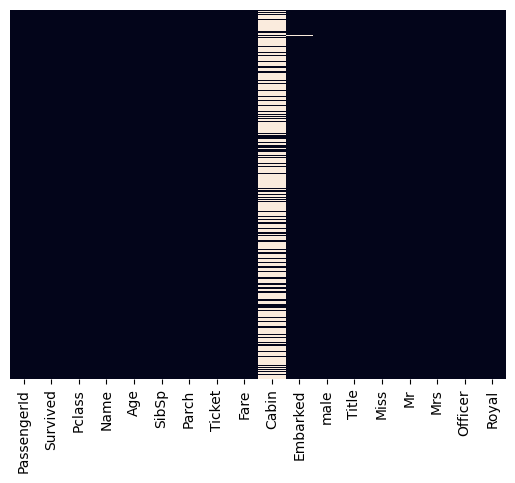

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

*We can now drop Name and Title columns*

In [14]:
df.drop(['Name','Title'],axis=1,inplace=True)

# Counting family members + passenger

In [15]:
def process_family():
    df['Family'] = df['SibSp'] + df['Parch'] + 1
process_family()

*We can drop SibSp and Parch, it would be overlapping data*

In [16]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Age,Ticket,Fare,Cabin,Embarked,male,Miss,Mr,Mrs,Officer,Royal,Family
0,1,0,3,22.0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,0,2
1,2,1,1,38.0,PC 17599,71.2833,C85,C,0,0,0,1,0,0,2
2,3,1,3,26.0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,1
3,4,1,1,35.0,113803,53.1000,C123,S,0,0,0,1,0,0,2
4,5,0,3,35.0,373450,8.0500,NaN,S,1,0,1,0,0,0,1


# Fixing missing Cabin data

In [18]:
def process_cabin():
    global df
    
    df['Cabin'].fillna('U',inplace=True)
    df['Cabin']= df['Cabin'].map(lambda cab:cab[0])
    cabin = pd.get_dummies(df['Cabin'],drop_first=True,dtype=int)
    df.drop('Cabin',axis=1,inplace=True)
    df = pd.concat([df,cabin],axis=1)
process_cabin()

# Processing Embarked into dummy variables

<Axes: xlabel='Embarked', ylabel='Count'>

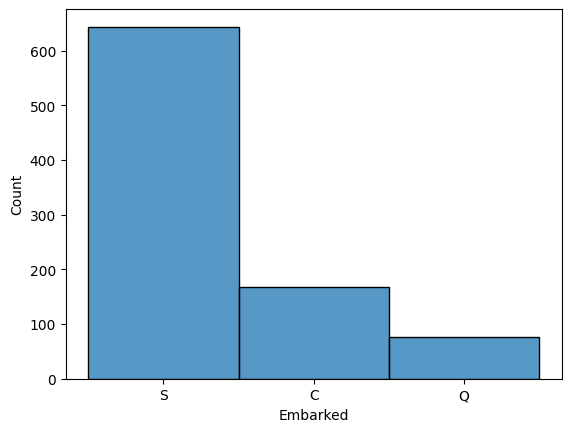

In [19]:
sns.histplot(df['Embarked'])

*Filling NaN values with 'S' as it's most common and making dummy variables*

In [20]:
def process_embarked():
    global df
    
    df['Embarked'].fillna('S',inplace=True)
    embark = pd.get_dummies(df['Embarked'],drop_first=True,dtype=int)
    df.drop('Embarked',axis=1,inplace=True)
    df = pd.concat([df,embark],axis=1)
process_embarked()

In [21]:
df.head()

,PassengerId,Survived,Pclass,Age,Ticket,Fare,male,Miss,Mr,Mrs,...,B,C,D,E,F,G,T,U,Q,S
0,1,0,3,22.0,A/5 21171,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,38.0,PC 17599,71.2833,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,3,1,3,26.0,STON/O2. 3101282,7.9250,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,35.0,113803,53.1000,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,5,0,3,35.0,373450,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,1,0,1


# Finally training the model

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(['PassengerId','Survived','Ticket'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [54]:
rfc = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_features=0.5,n_jobs=-1)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

# Evaluating the model

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       177
           1       0.83      0.69      0.75        91

    accuracy                           0.85       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.85      0.85      0.84       268



In [27]:
print(confusion_matrix(y_test,predictions))

[[163  14]
 [ 30  61]]


*After submitting predictions to Kaggle I got 0.77033 score*